#Restaurant Data Analysis - Level 3
###Project Type: Data Analysis
###Industry: Cognifyz Technologies
###Contribution: Individual
####Level: 3
###Project Summary
This project is part of my internship at Cognifyz, where I analyzed restaurant data to find useful insights. The dataset includes information like restaurant names, cities, ratings, price ranges, and delivery options. This Level 1 project covers basic data analysis tasks that help understand restaurant trends.

###Problem Statement:

The objective is to analyze various aspects of restaurant reviews, customer votes, and service offerings to uncover insights that could help businesses improve their services and customer satisfaction. This includes understanding sentiment in reviews, the relationship between review length and ratings, and the availability of services like online delivery and table booking in relation to price range.

###Tasks:

####*.Sentiment Analysis: Identify the most common positive and negative keywords in customer reviews.
####*.Review Length Analysis: Calculate the average length of reviews and explore the relationship between review length and restaurant ratings.
####*.Vote Analysis: Identify restaurants with the highest and lowest number of votes.
####*.Correlation Between Votes and Rating: Analyze the correlation between the number of votes and the rating of a restaurant.
####*.Price Range vs. Services: Determine if there is a relationship between the price range and the availability of online delivery and table booking.
####*.Higher-Priced Restaurants and Services: Analyze if higher-priced restaurants are more likely to offer online delivery and table booking.

###Goal:

To uncover meaningful insights regarding customer preferences, review characteristics, and the impact of pricing on service offerings to assist restaurants in enhancing their business strategies.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/ashuBAXLA/Restaurant_analysis_congifiyz-/69f2345c48e79480a76a3b677a8cc9808204b1d6/Dataset%20.csv',delimiter=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
missing_values =df.isnull().sum()
print(missing_values)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
df = df.dropna(subset=['Cuisines'])

### **Task 1 restaurant reviews**,
 * Analyze the text reviews to identify the most  common positive and negative keywords.
 * Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [ ]:
# Analyze the text reviews to identify the most common positive and negative keywords.
df["Rating text"].value_counts()


,count
Rating text,
Average,3734
Not rated,2148
Good,2096
Very Good,1078
Excellent,300
Poor,186


###**Task:** Votes Analysis
* Identify the restaurants with the highest and
lowest number of votes.
* Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [ ]:
#Identify the restaurants with the highest and lowest number of votes
highest_votes = df.loc[df['Votes'].idxmax()]
lowest_votes = df.loc[df['Votes'].idxmin()]

print("Restaurant with the highest votes:")
print(highest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])

print('----------------------------------')

print("\nRestaurant with the lowest votes:")
print(lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating']])



Restaurant with the highest votes:
Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object
----------------------------------

Restaurant with the lowest votes:
Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object



Correlation between Votes and Aggregate Rating: 0.31


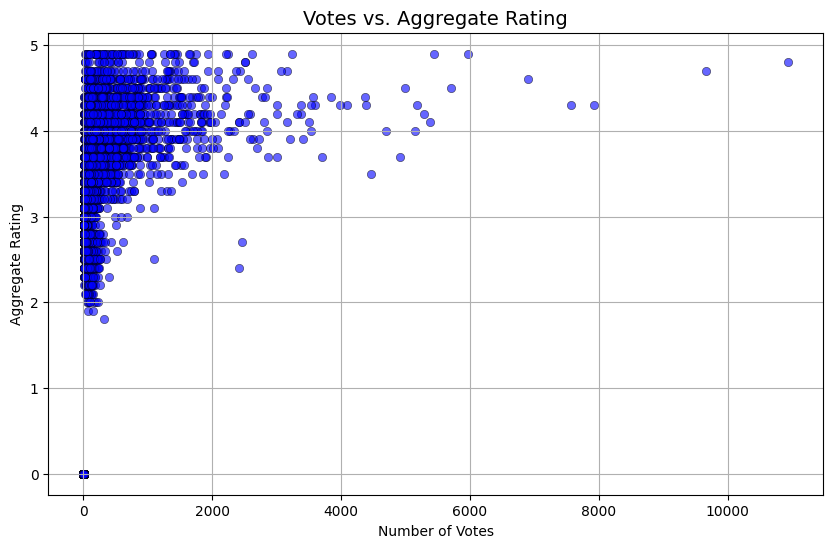

In [ ]:
#Analyze if there is a correlation between the number of votes and the rating of a restaurant.
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between Votes and Aggregate Rating: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='blue', alpha=0.6, edgecolor='black')
plt.title('Votes vs. Aggregate Rating', fontsize=14)
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

###**Task: Price Range vs. Online Delivery and Table Booking**
* Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.
* Determine if higher-priced restaurants are
more likely to offer these services

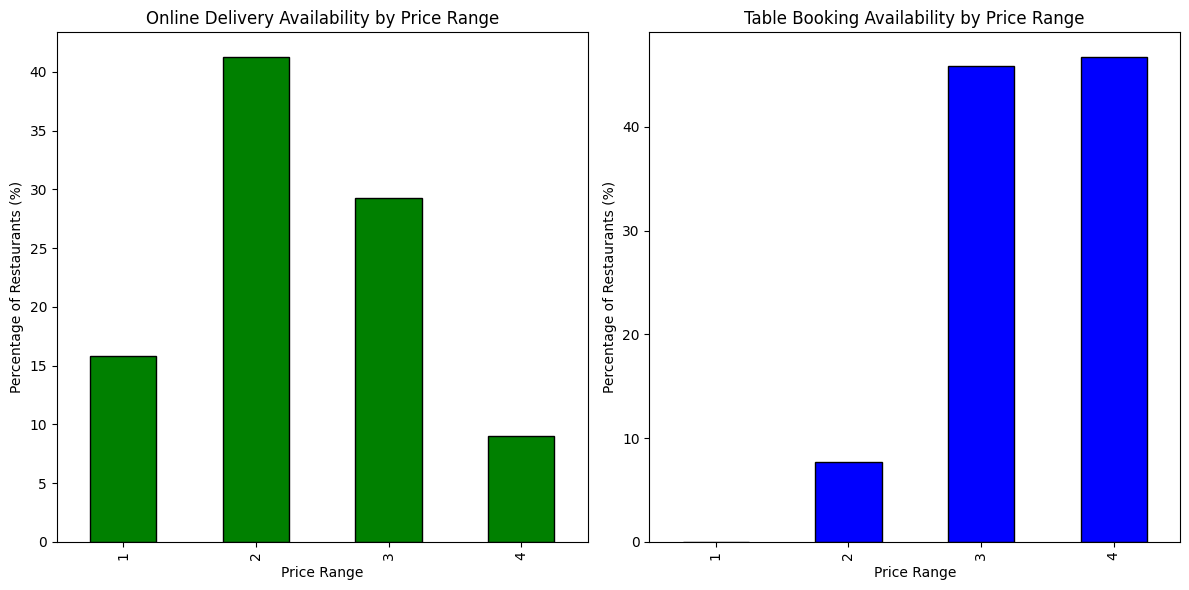

Online Delivery by Price Range (%)
Price range
1    15.795403
2    41.310633
3    29.252669
4     9.044369
Name: Yes, dtype: float64

Table Booking by Price Range (%)
Price range
1     0.022533
2     7.677482
3    45.836299
4    46.757679
Name: Yes, dtype: float64


In [ ]:
#Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

# Step 1: Group data by price range and calculate percentages
online_delivery = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack(fill_value=0)['Yes'] * 100
table_booking = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack(fill_value=0)['Yes'] * 100

# Step 2: Plot the results
plt.figure(figsize=(12, 6))

# Online Delivery
plt.subplot(1, 2, 1)
online_delivery.plot(kind='bar', color='green', edgecolor='black')
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants (%)')

# Table Booking
plt.subplot(1, 2, 2)
table_booking.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants (%)')

plt.tight_layout()
plt.show()

# Step 3: Display results
print("Online Delivery by Price Range (%)")
print(online_delivery)

print("\nTable Booking by Price Range (%)")
print(table_booking)




In [ ]:
# Check if higher-priced restaurants are more likely to offer these services

# Calculate percentages for Online Delivery and Table Booking in each price range
online_delivery_in_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack(fill_value=0)['Yes'] * 100
table_booking_in_price_range = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack(fill_value=0)['Yes'] * 100

# Display the percentages
print("Online Delivery by Price Range (%)")
print(online_delivery_in_price_range)

print("\nTable Booking by Price Range (%)")
print(table_booking_in_price_range)


Online Delivery by Price Range (%)
Price range
1    15.795403
2    41.310633
3    29.252669
4     9.044369
Name: Yes, dtype: float64

Table Booking by Price Range (%)
Price range
1     0.022533
2     7.677482
3    45.836299
4    46.757679
Name: Yes, dtype: float64


###**Level 3 Conclusion**
The Level 3 analysis reveals important insights into customer feedback, votes, and the relationship between price range and service offerings:

* Restaurant Reviews: Positive keywords like "Excellent" and "Very Good" are common, aligning with higher ratings, while negative keywords reflect dissatisfaction. The correlation between review length and ratings suggests that more detailed feedback might be tied to higher satisfaction levels.

* Votes Analysis:  Restaurants with more votes, like **Toit**, tend to have higher ratings, with a moderate positive correlation between votes and ratings. However, restaurants with no votes, like **Cantinho da Gula**, reflect poor customer interaction or visibility.

* Price Range vs. Services: Mid-range restaurants are more likely to offer online delivery, while premium restaurants focus more on table booking services. This suggests that customer expectations for different price ranges influence the types of services offered.